# ภาพเอ็กซ์เรย์ทรวงอก (ปอดบวม)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

list_dir = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    list_dir.append(dirname)

df = pd.DataFrame(list_dir)
df[0].unique()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

array(['/kaggle/input', '/kaggle/input/chest-xray-pneumonia',
       '/kaggle/input/chest-xray-pneumonia/chest_xray',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL',
       '/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX',
       '/kaggle/input/chest-xray-pneumonia/chest_xr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense , Dropout , GlobalMaxPooling2D , BatchNormalization , Conv2D , MaxPooling2D , InputLayer , Flatten
from sklearn.metrics import *

In [3]:
train_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [4]:
img_data = ImageDataGenerator(rescale=1/255.0)

In [5]:
img_data.flow_from_directory(train_path)
img_data.flow_from_directory(val_path)
img_data.flow_from_directory(test_path)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### จำนวนรูปภาพของแต่ละชุดข้อมูล

In [6]:
train_generator = img_data.flow_from_directory(train_path , target_size=(224,224) , batch_size=5216)
val_generator = img_data.flow_from_directory(val_path , target_size=(224,224) , batch_size=16)
test_generator = img_data.flow_from_directory(test_path , target_size=(224,224) , batch_size=624)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
x_train , y_train = train_generator.next()

In [8]:
x_train.shape

(5216, 224, 224, 3)

In [9]:
x_val , y_val = val_generator.next()
x_test , y_test = test_generator.next()

In [10]:
x_val.shape

(16, 224, 224, 3)

In [11]:
x_test.shape

(624, 224, 224, 3)

In [12]:
class_count = pd.DataFrame(np.argmax(y_train , axis=1))

In [13]:
class_count[0] = class_count[0].map(lambda x : 'Pneumonia' if x==1 else 'Normal')

### จำนวนผู้ป่วยที่ปกติและเป็นโรคปอดบวม

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


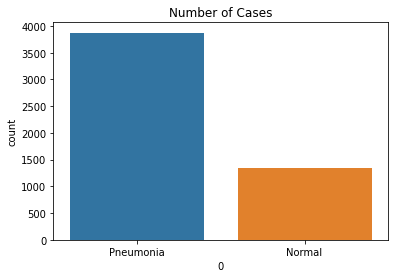

In [14]:
sns.countplot(class_count[0])
plt.title('Number of Cases');

In [15]:
def show_img(i , num) :
    ax[i].imshow(x_train[num])
    ax[i].set_title('Pneumonia' if np.argmax(y_train[num])==1 else 'Normal' )

### ภาพเอ็กซ์เรย์ทรวงอกของผู้ป่วยโรคปอดบวมเมื่อเทียบกับผู้ป่วยปกติ

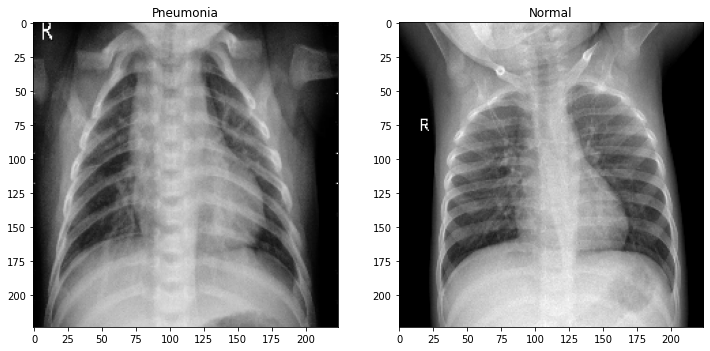

In [16]:
fig , ax = plt.subplots(1,2 , figsize=(12,7))

for i , num in enumerate(np.random.randint(1,len(x_train),2)) :
    show_img(i , num)


### สร้าง CNN Model

In [17]:
model = keras.Sequential()

model.add(Conv2D(32 , (3,3) , input_shape=(224,224,3) , padding = 'same' , activation='relu'))
model.add(MaxPooling2D((2,2) , padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(32 , (3,3) , padding = 'same' , activation='relu'))
model.add(MaxPooling2D((2,2) , padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64 , (3,3) , padding = 'same' , activation='relu'))
model.add(MaxPooling2D((2,2) , padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3,3) , padding = 'same' , activation='relu'))
model.add(MaxPooling2D((2,2) , padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(128 , (3,3) , padding = 'same' , activation='relu'))
model.add(MaxPooling2D((2,2) , padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512 , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2 , activation='softmax'))

model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        1

### Model Training

In [18]:
model_history = model.fit(x_train , y_train , validation_data=(x_val , y_val) , epochs=20)

Epoch 1/20
163/163 [==============================] - 15s 35ms/step - loss: 1.1579 - accuracy: 0.8651 - val_loss: 10.2063 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 5s 28ms/step - loss: 0.1513 - accuracy: 0.9587 - val_loss: 9.4134 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 5s 31ms/step - loss: 0.1182 - accuracy: 0.9703 - val_loss: 8.0799 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 5s 29ms/step - loss: 0.0904 - accuracy: 0.9776 - val_loss: 0.0959 - val_accuracy: 0.9375
Epoch 5/20
163/163 [==============================] - 5s 29ms/step - loss: 0.0670 - accuracy: 0.9859 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/20
163/163 [==============================] - 5s 29ms/step - loss: 0.0453 - accuracy: 0.9868 - val_loss: 1.1052 - val_accuracy: 0.9375
Epoch 7/20
163/163 [==============================] - 5s 28ms/step - loss: 0.0576 - accuracy: 0.9872 - val_loss: 0.0198 - val_accuracy: 1.00

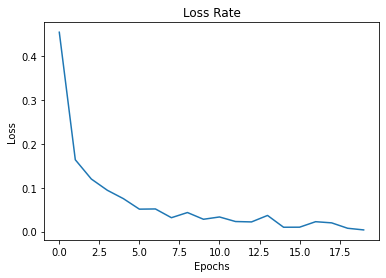

In [27]:
plt.plot(model_history.history['loss'])
plt.title('Loss Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss');

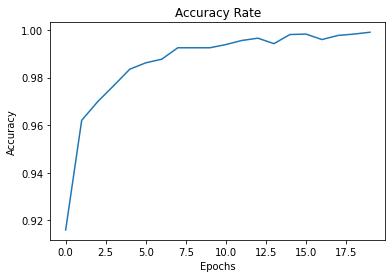

In [28]:
plt.plot(model_history.history['accuracy'])
plt.title('Accuracy Rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

### Model Evaluation

In [21]:
loss , accuracy = model.evaluate(x_test , y_test)

20/20 [==============================] - 0s 14ms/step - loss: 4.4306 - accuracy: 0.8349


In [22]:
print('Loss :',loss)
print('Accuracy :',accuracy)

Loss : 4.4306416511535645
Accuracy : 0.8349359035491943


In [23]:
prediction = model.predict(x_test)
class_prediction = np.argmax(prediction , axis=1)

In [24]:
print(classification_report(np.argmax(y_test , axis=1) , class_prediction))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73       234
           1       0.80      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.88      0.79      0.80       624
weighted avg       0.86      0.83      0.82       624



In [25]:
conf_df = pd.DataFrame(confusion_matrix(np.argmax(y_test , axis=1) , class_prediction) , columns=['Normal', 'Pneumonia'] , index=['Normal', 'Pneumonia'])

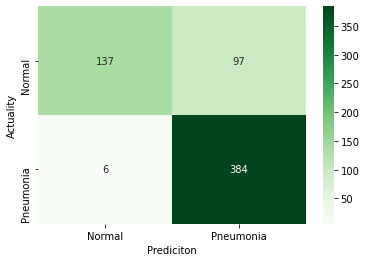

In [26]:
sns.heatmap(conf_df , annot=True , fmt='.0f' , cmap='Greens')
plt.xlabel('Prediciton')
plt.ylabel('Actuality');